### **Import Libraries**

In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D ,MaxPooling2D   # read image, reduce size of data
from keras.layers import Dense, Dropout, Flatten # fully connected, prevent overfitting, convert 2d metrix into 1 layer to feed into NN classifier
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
import pickle
import pandas as pd
import numpy as np
import random

In [5]:
!pip install keras

### **Import Dataset and Explore it**

In [2]:
# cloning repo containing the traffic sign dataset
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [2]:
# list dataset contents
 
!ls german-traffic-signs


signnames.csv  test.p  train.p	valid.p


In [3]:
#load the dataset

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [10]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [ ]:
# totally 43 signs

In [4]:
#loading pickled dataset

with open("german-traffic-signs/train.p",mode='rb') as training:
  train = pickle.load(training)

with open("german-traffic-signs/valid.p",mode='rb') as validation:
  valid = pickle.load(validation)

with open("german-traffic-signs/test.p",mode='rb') as testing:
  test = pickle.load(testing)

In [ ]:
# feature: img data of traffic sign img
# label: class id of the traffic sign

In [5]:
X_train , y_train = train['features'], train['labels']
X_validation , y_validation = valid['features'], valid['labels']
X_test , y_test = test['features'], test['labels']

In [18]:
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)
# number of img; dimension=32*32; RGB(number of channels=3)
# total: 51839
# train: 2/3
# test+val: 1/3
# test:validation=3:1

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [19]:
34799+4410+12630

51839

image label=18


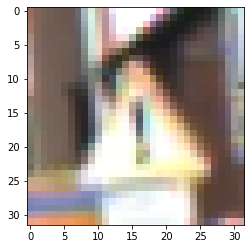

In [22]:
index = np.random.randint(1,len(X_train))
plt.imshow(X_train[index])
print("image label={}".format(y_train[index]))


# Image Pre-processing

### 1. Converting to grayscale
### 2. Histogram Equalization
### 3. Normalization

In [ ]:
# 1. color of the traffic sign is not that important
# 2. to standardize all img, 
##    i.e. some are brighter, others are dim
##         increases the global contrast
# 3. [0,1]

In [6]:
# shuffle the data
from sklearn.utils import shuffle
X_train , y_train = shuffle(X_train,y_train)
# to avoid learning the order of the img


In [7]:
def preprocessing(img): 
  #convert to grayscale
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Applying histogram equalization 
  img = cv2.equalizeHist(img)
  #Normalization
  img = img/255
  return img
    
     

In [8]:
X_train_processed = np.array(list(map(preprocessing,X_train)))
X_validation_processed = np.array(list(map(preprocessing,X_validation)))
X_test_processed = np.array(list(map(preprocessing,X_test)))


In [9]:
# flatten: to 1d array
X_train_processed = X_train_processed.reshape(34799,32,32,1)
X_test_processed = X_test_processed.reshape(12630,32,32,1)
X_validation_processed = X_validation_processed.reshape(4410,32,32,1)

In [28]:
print(X_train_processed.shape)
print(X_test_processed.shape)
print(X_validation_processed.shape)


(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


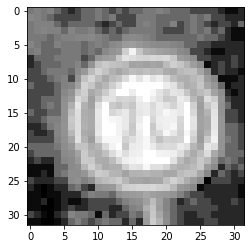

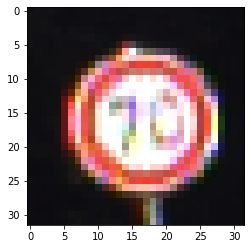

In [11]:
i= random.randint(1,len(X_train)) # before vs after processing
plt.imshow(X_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i].squeeze())

# Build Deep Convolution Neural Network Model 

In [ ]:
# https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/

In [ ]:
# we have a input, such as an image of pixel values, and we have a filter, which is a set of weights, and the filter is systematically applied to the input data to create a feature map.
# input -> img patch*filter -> feature map (output aka convoluted feature)
# dot product
# different filter can detect different charasteristic of img. i.e. edge/sharppen/blur


In [ ]:
# conv1: extract features (detect angle/edge/...)
# conv2: max pooling, flatten (use angle/edges to detect human nose/eye)
# feed into fully connect layer

![This is an image](https://drive.google.com/uc?export=view&id=1ttebzn6qPhoRsnYKRpE1ZxFlHK1IoMsm)

In [31]:

model = Sequential()
# add the convolutional layer
# filters, size of filters,input_shape,activation_function
# 32 filters(features), size=5*5
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

# pooling layer
# reduce the size of img to half
#  (2, 2) will take the max value over a 2x2 pooling window
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
# prevent over-fitting
model.add(Dropout(0.25))

# repeat again:

# add another convolutional layer
# 32 filters(features), size=5*5
model.add(Conv2D(64,(5,5),activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256,activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))

# defining the ouput layer of our network
# we have 43 different traffic signs
model.add(Dense(43,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [32]:
#compile our model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
history = model.fit(X_train_processed,
                    y_train,
                    batch_size=500,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 12s 36ms/step - loss: 3.5680 - accuracy: 0.0660 - val_loss: 3.4581 - val_accuracy: 0.1197
Epoch 2/50
70/70 [==============================] - 2s 27ms/step - loss: 3.2703 - accuracy: 0.1543 - val_loss: 3.0481 - val_accuracy: 0.3311
Epoch 3/50
70/70 [==============================] - 2s 28ms/step - loss: 2.7589 - accuracy: 0.3015 - val_loss: 2.4945 - val_accuracy: 0.4125
Epoch 4/50
70/70 [==============================] - 2s 27ms/step - loss: 2.3082 - accuracy: 0.4000 - val_loss: 2.0614 - val_accuracy: 0.4896
Epoch 5/50
70/70 [==============================] - 2s 27ms/step - loss: 1.9797 - accuracy: 0.4639 - val_loss: 1.7280 - val_accuracy: 0.5397
Epoch 6/50
70/70 [==============================] - 2s 27ms/step - loss: 1.7319 - accuracy: 0.5142 - val_loss: 1.4820 - val_accuracy: 0.6159
Epoch 7/50
70/70 [==============================] - 2s 27ms/step - loss: 1.5340 - accuracy: 0.5585 - val_loss: 1.2898 - val_accuracy: 0.6653
Epoch 8/50
7

# Evaluate Performance of the model

In [ ]:
# identify overfitting with train vs validation graph

In [34]:
# feed test data
score = model.evaluate(X_test_processed,y_test)
print('Test accuracy',score[1])

395/395 [==============================] - 2s 4ms/step - loss: 0.3398 - accuracy: 0.9103
Test accuracy 0.9102929830551147


In [35]:
# check overfitting:
# plot validation loss/accuracy and train loss/accuracy 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epochs')

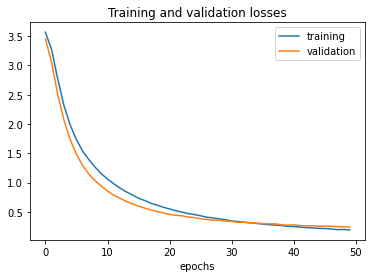

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')
# both go down, good.

Text(0.5, 0, 'epochs')

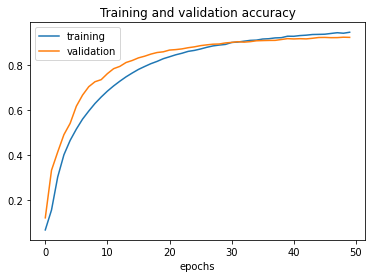

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
# both go up, good

In [39]:
# generate prediction on test data
prediction = np.argmax(model.predict(X_test_processed), axis=-1)
y_true_label= y_test

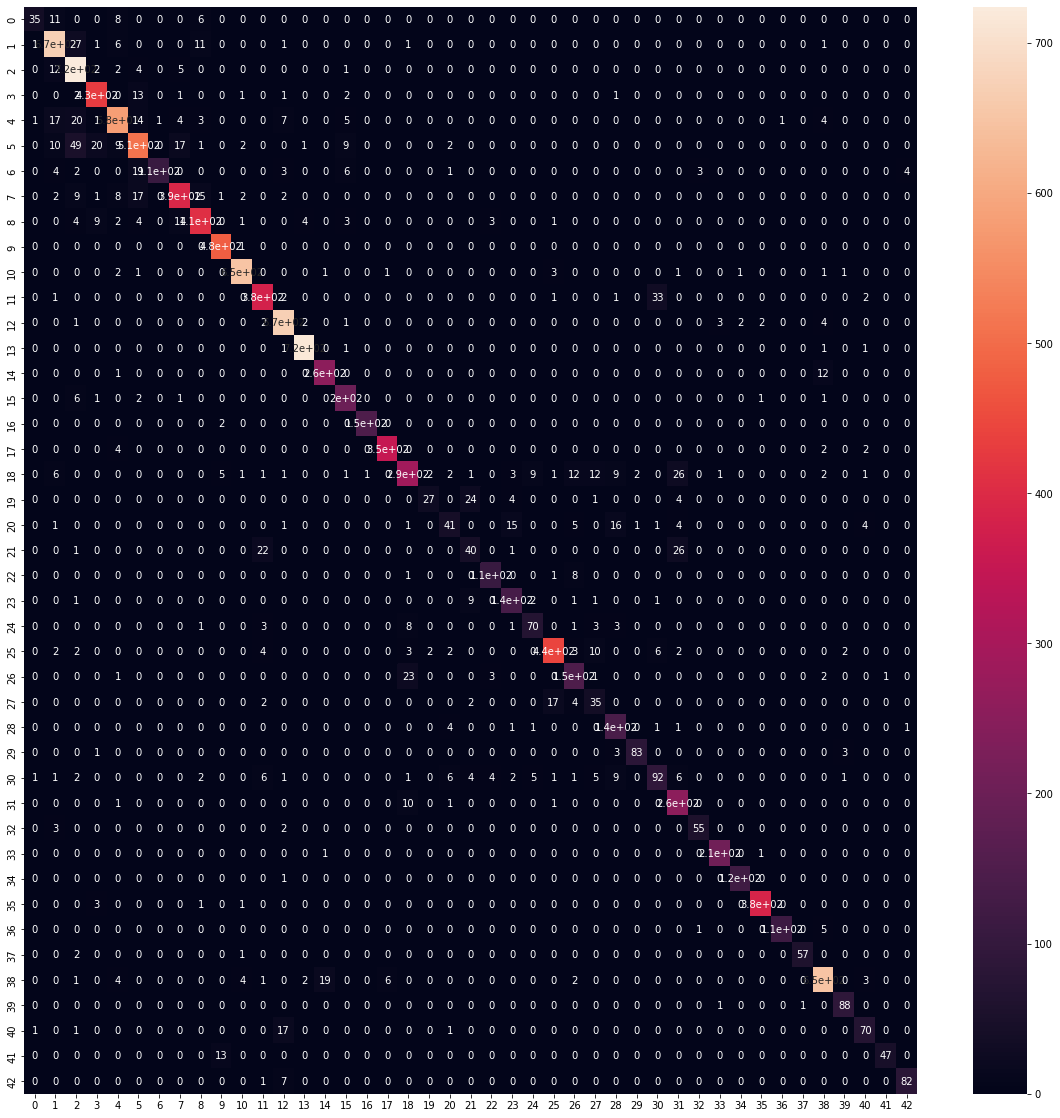

In [40]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)
# diagnal are bright, good (classified correctly)
# samples fall into black region are misclassified

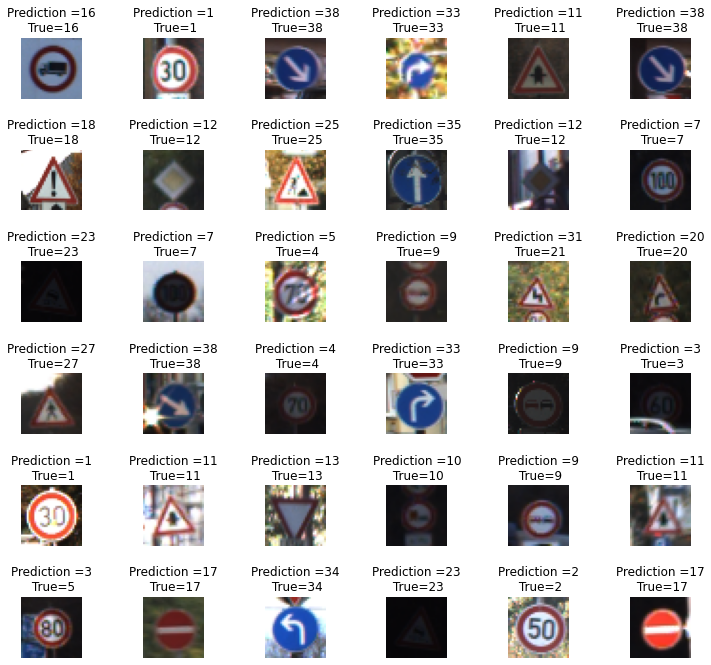

In [41]:
# display 36 prediction vs true labels:
L=6
W=6
fig , axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()
for i in range(0,L*W):
  axes[i].imshow(X_test[i])  # original img
  axes[i].set_title('Prediction ={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

  
  

In [42]:
model.save('my_model.h5')